In [1]:
import nba_api.stats.endpoints as ep

import pandas as pd


In [2]:
#Add all imports from endpoints on api
import pytest
import datetime
import time
from nba_api.stats.endpoints import Scoreboard
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayByPlay
from nba_api.stats.library.parameters import LeagueID
from nba_api.stats.library.eventmsgtype import EventMsgType
from nba_api.stats.library.playbyplayregex import eventmsgtype_to_re
from nba_api.stats.endpoints import DraftHistory, CommonPlayerInfo
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.endpoints import PlayerAwards
from nba_api.stats.endpoints import playerawards
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import commonplayerinfo, playerdashboardbyyearoveryear
import pandas as pd




In [3]:


# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print("Number of teams fetched: {}".format(len(nba_teams)))
nba_teams[:3]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [4]:


# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print("Number of players fetched: {}".format(len(nba_players)))
nba_players[:5]

Number of players fetched: 4900


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

In [5]:
spurs = [team for team in nba_teams if team["full_name"] == "San Antonio Spurs"][0]
spurs

{'id': 1610612759,
 'full_name': 'San Antonio Spurs',
 'abbreviation': 'SAS',
 'nickname': 'Spurs',
 'city': 'San Antonio',
 'state': 'Texas',
 'year_founded': 1976}

In [7]:
big_fundamental = [
    player for player in nba_players if player["full_name"] == "James Harden"
][0]
big_fundamental

{'id': 201935,
 'full_name': 'James Harden',
 'first_name': 'James',
 'last_name': 'Harden',
 'is_active': True}

In [23]:

# Specify the year you're interested in
year = 2020

# Use the DraftHistory endpoint to get draft picks for the specified year
draft_history = DraftHistory()
draft_history_df = draft_history.get_data_frames()[0]

# Display the columns in the dataframe to inspect their names
print(draft_history_df.columns)

# Now, let's find the overall number one pick for the specified year
number_one_pick = draft_history_df[(draft_history_df['ROUND_NUMBER'] == 1) & (draft_history_df['ROUND_PICK'] == 1) & (draft_history_df['SEASON'] == str(year))]

# Retrieve the 'PERSON_ID'
person_id = number_one_pick['PERSON_ID'].values[0]

# Use the 'PERSON_ID' to get additional player information
player_info = CommonPlayerInfo(player_id=person_id)
player_info_df = player_info.get_data_frames()[0]

# Display the player information
print(player_info_df[['DISPLAY_FIRST_LAST', 'TEAM_ABBREVIATION']])



Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG'],
      dtype='object')
  DISPLAY_FIRST_LAST TEAM_ABBREVIATION
0    Anthony Edwards               MIN


In [15]:


# Create an empty list to store the overall number one picks
number_one_picks_list = []


for year in range(2012, 2023):
   
    draft_history = DraftHistory()
    
    
    try:
        draft_history_df = draft_history.get_data_frames()[0]
        
       
        draft_history_year = draft_history_df[draft_history_df['SEASON'] == str(year)]
        
        
        number_one_pick = draft_history_year[draft_history_year['OVERALL_PICK'] == 1]
        
        
        if not number_one_pick.empty:
            player_info = number_one_pick[['PLAYER_NAME', 'TEAM_ABBREVIATION']].iloc[0]
            number_one_picks_list.append([year, player_info['PLAYER_NAME'], player_info['TEAM_ABBREVIATION']])
            
    except Exception as e:
        print(f"Error fetching data for {year}: {e}")

# Display the list of overall number one picks 
headers = ["Year", "Player Name", "Team Abbreviation"]
for row in [headers] + number_one_picks_list:
    print("\t".join(map(str, row)))






Year	Player Name	Team Abbreviation
2012	Anthony Davis	NOH
2013	Anthony Bennett	CLE
2014	Andrew Wiggins	CLE
2015	Karl-Anthony Towns	MIN
2016	Ben Simmons	PHI
2017	Markelle Fultz	PHI
2018	Deandre Ayton	PHX
2019	Zion Williamson	NOP
2020	Anthony Edwards	MIN
2021	Cade Cunningham	DET
2022	Paolo Banchero	ORL


In [39]:


# Specify parameters for each player and their respective seasons
players_and_seasons_draft = {
    'Anthony Davis': ['2012-13'],
    'Anthony Bennett': ['2013-14'],
    'Andrew Wiggins': ['2014-15'],
    'Karl-Anthony Towns': ['2015-16'],
    'Ben Simmons': ['2016-17'],
    'Markelle Fultz': ['2017-18'],
    'Deandre Ayton': ['2018-19'],
    'Zion Williamson': ['2019-20'],
    'Anthony Edwards': ['2020-21'],
    'Cade Cunningham': ['2021-22'],
    'Paolo Banchero': ['2022-23']
}


combined_playerdraft_stats_df = pd.DataFrame()


def fetch_and_append(playerdraft_name, seasons):
    global combined_playerdraft_stats_df  

    for season in seasons:
        playerdraft_id = get_playerdraft_id(playerdraft_name)  
        
        try:
            playerdraft_stats_data = playerdashboardbyyearoveryear.PlayerDashboardByYearOverYear(player_id=playerdraft_id, season=season)
            playerdraft_stats_df = playerdraft_stats_data.get_data_frames()[0]

            selected_columns = [
                'TEAM_ID', 'TEAM_ABBREVIATION', 'GROUP_VALUE','GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
                'FG_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
                'BLK', 'BLKA', 'PF', 'PFD', 'PTS'
            ]

            
            selected_playerdraft_stats_df = playerdraft_stats_df[selected_columns]

            selected_playerdraft_stats_df['PLAYER_NAME'] = playerdraft_name

            
            combined_playerdraft_stats_df = pd.concat([combined_playerdraft_stats_df, selected_playerdraft_stats_df], ignore_index=True)

        except Exception as e:
            print(f"Error fetching data for {playerdraft_name} in season {season}: {e}")

    return combined_playerdraft_stats_df

# Function to get player ID from player name 
def get_playerdraft_id(playerdraft_name):
    playerdraft_id_mapping = {
        'Anthony Davis': '203076',
        'Anthony Bennett': '203461',
        'Andrew Wiggins': '203952',
        'Karl-Anthony Towns': '1626157',
        'Ben Simmons': '1627732',
        'Markelle Fultz': '1628365',
        'Deandre Ayton': '1629028',
        'Zion Williamson': '1629627',
        'Anthony Edwards': '1630161',
        'Cade Cunningham': '1630541',
        'Paolo Banchero': '1630571'
    }
    return playerdraft_id_mapping.get(playerdraft_name, None)


for playerdraft_name, seasons in players_and_seasons_draft.items():
    combined_playerdraft_stats_df = fetch_and_append(playerdraft_name, seasons)

combined_playerdraft_stats_df = combined_playerdraft_stats_df.set_index("PLAYER_NAME")

display(combined_playerdraft_stats_df)


/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/519408541.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_playerdraft_stats_df['PLAYER_NAME'] = playerdraft_name
/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/519408541.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_playerdraft_stats_df['PLAYER_NAME'] = playerdraft_name
/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/519408541.py:41: SettingWithCopyWarning: 
A value is trying to 

,TEAM_ID,TEAM_ABBREVIATION,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Anthony Davis,1610612740,NOH,2012-13,64,23,41,0.359,1845.951667,349,676,...,357,522,63,89,75,112,47,158,202,867
Anthony Bennett,1610612739,CLE,2013-14,52,20,32,0.385,662.638333,80,225,...,106,155,17,47,21,8,15,93,46,217
Andrew Wiggins,1610612750,MIN,2014-15,82,16,66,0.195,2968.796667,497,1137,...,240,374,170,177,86,50,67,190,376,1387
Karl-Anthony Towns,1610612750,MIN,2015-16,82,29,53,0.354,2626.485000,625,1153,...,629,858,161,183,58,138,69,245,244,1503
Markelle Fultz,1610612755,PHI,2017-18,14,11,3,0.786,252.981667,45,111,...,32,43,53,17,12,4,18,22,20,100
Deandre Ayton,1610612756,PHX,2018-19,71,17,54,0.239,2182.688333,509,870,...,506,729,125,126,61,67,43,209,198,1159
Zion Williamson,1610612740,NOP,2019-20,24,11,13,0.458,668.141667,210,360,...,86,150,50,59,16,9,39,42,133,540
Cade Cunningham,1610612744,GSW,2021-22,52,35,17,0.673,607.120000,80,183,...,63,80,23,13,7,10,3,43,33,228


In [18]:


# Function to fetch all awards for a given player ID
def get_player_awards(player_id):
    
    player_awards_data = playerawards.PlayerAwards(player_id=player_id)
    player_awards_df = player_awards_data.get_data_frames()[0]
    return player_awards_df

# Function to filter MVP awards from a DataFrame
def filter_mvp_awards(df):
    return df[df['DESCRIPTION'] == 'NBA Most Valuable Player']

# List of player IDs
player_ids = [
    '1495', '708', '959', '1717', '977', '2544', '201565',
    '201142', '201939', '201566', '201935', '203507', '203999', '203954'
]

# Create an empty DataFrame with selected columns
mvp_df = pd.DataFrame(columns=['Player', 'First_Name', 'Last_Name', 'TEAM', 'DESCRIPTION', 'SEASON', 'CONFERENCE', 'TYPE'])


for player_id in player_ids:
    try:
        
        player_awards_df = get_player_awards(player_id)

        
        player_mvp_df = filter_mvp_awards(player_awards_df).assign(Player=player_id)

        
        player_info = player_awards_df[['FIRST_NAME', 'LAST_NAME', 'TEAM']].iloc[0]
        player_mvp_df['Player'] = player_id
        player_mvp_df['First_Name'] = player_info['FIRST_NAME']
        player_mvp_df['Last_Name'] = player_info['LAST_NAME']
        player_mvp_df['TEAM'] = player_info['TEAM']

       
        player_mvp_df = player_mvp_df[['Player', 'First_Name', 'Last_Name', 'TEAM', 'DESCRIPTION', 'SEASON', 'CONFERENCE', 'TYPE']]

        
        mvp_df = pd.concat([mvp_df, player_mvp_df], ignore_index=True)

    except Exception as e:
        print(f"Error fetching data for {player_id}: {e}")


display(mvp_df)


,Player,First_Name,Last_Name,TEAM,DESCRIPTION,SEASON,CONFERENCE,TYPE
0,1495,Tim,Duncan,San Antonio Spurs,NBA Most Valuable Player,2001-02,None,Award
1,1495,Tim,Duncan,San Antonio Spurs,NBA Most Valuable Player,2002-03,None,Award
2,708,Kevin,Garnett,Minnesota Timberwolves,NBA Most Valuable Player,2003-04,None,Award
3,959,Steve,Nash,Dallas Mavericks,NBA Most Valuable Player,2004-05,None,Award
4,959,Steve,Nash,Dallas Mavericks,NBA Most Valuable Player,2005-06,None,Award
5,1717,Dirk,Nowitzki,Dallas Mavericks,NBA Most Valuable Player,2006-07,None,Award
6,977,Kobe,Bryant,Los Angeles Lakers,NBA Most Valuable Player,2007-08,None,Award
7,2544,LeBron,James,Cleveland Cavaliers,NBA Most Valuable Player,2008-09,None,Award
8,2544,LeBron,James,Cleveland Cavaliers,NBA Most Valuable Player,2009-10,None,Award
9,2544,LeBron,James,Cleveland Cavaliers,NBA Most Valuable Player,2011-12,None,Award


In [35]:


# Specify parameters for each player and their respective seasons
players_and_seasons = {
    'LeBron James': ['2012-13'],
    'Kevin Durant': ['2013-14'],
    'Stephen Curry': ['2014-15', '2015-16'],
    'Russell Westbrook': ['2016-17', '2017-18'],
    'James Harden': ['2017-18'],
    'Giannis Antetokounmpo': ['2018-19', '2019-20'],
    'Nikola Jokic': ['2020-21', '2021-22'],
    'Joel Embiid': ['2022-23']
}


combined_player_stats_df = pd.DataFrame()

# Function to fetch and append data to the DataFrame
def fetch_and_append(player_name, seasons):
    global combined_player_stats_df  

    # Convert player name to player ID using commonplayerinfo
    player_info = commonplayerinfo.CommonPlayerInfo(player_id=get_player_id(player_name))
    player_info_df = player_info.get_data_frames()[0]

    for season in seasons:
        player_stats_data = playerdashboardbyyearoveryear.PlayerDashboardByYearOverYear(player_id=player_info_df['PERSON_ID'].iloc[0], season=season)
        player_stats_df = player_stats_data.get_data_frames()[0]

        
        selected_columns = [
            'TEAM_ID', 'TEAM_ABBREVIATION', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
            'FG_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
            'BLK', 'BLKA', 'PF', 'PFD', 'PTS'
        ]

        # Create a new DataFrame with selected columns
        selected_player_stats_df = player_stats_df[selected_columns]

        
        selected_player_stats_df['PLAYER_NAME'] = player_name

       
        combined_player_stats_df = pd.concat([combined_player_stats_df, selected_player_stats_df], ignore_index=True)

    return combined_player_stats_df

# Function to get player ID from player name (you may need to provide this mapping)
def get_player_id(player_name):
    
    #dictionary mapping player names to IDs
    player_id_mapping = {
        'LeBron James': '2544',
        'Kevin Durant': '201142',
        'Stephen Curry': '201939',
        'Russell Westbrook': '201566',
        'James Harden': '201935',
        'Giannis Antetokounmpo': '203507',
        'Nikola Jokic': '203999',
        'Joel Embiid': '203954'
    }
    return player_id_mapping.get(player_name, None)


for player_name, seasons in players_and_seasons.items():
    combined_player_stats_df = fetch_and_append(player_name, seasons)

combined_player_stats_df=combined_player_stats_df.set_index("PLAYER_NAME")

display(combined_player_stats_df)

/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/183610073.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_player_stats_df['PLAYER_NAME'] = player_name
/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/183610073.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_player_stats_df['PLAYER_NAME'] = player_name
/var/folders/x0/8n2k0kss4bx4rbx_l9v_qcc80000gn/T/ipykernel_21300/183610073.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,TEAM_ID,TEAM_ABBREVIATION,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
LeBron James,1610612748,MIA,2012-13,76,61,15,0.803,2877.055000,765,1354,...,513,610,551,226,129,67,41,110,439,2036
Kevin Durant,1610612760,OKC,2013-14,81,58,23,0.716,3121.706667,849,1688,...,540,598,445,285,103,59,42,174,522,2593
Stephen Curry,1610612744,GSW,2014-15,80,67,13,0.838,2613.200000,653,1341,...,285,341,619,249,163,16,36,158,298,1900
Stephen Curry,1610612744,GSW,2015-16,79,71,8,0.899,2699.975000,805,1598,...,362,430,527,262,169,15,52,161,356,2375
Russell Westbrook,1610612760,OKC,2016-17,81,46,35,0.568,2801.748333,824,1941,...,727,864,840,438,132,31,91,190,541,2558
Russell Westbrook,1610612760,OKC,2017-18,80,47,33,0.588,2913.656667,757,1687,...,652,804,820,381,147,20,84,200,460,2028
James Harden,1610612745,HOU,2017-18,72,59,13,0.819,2550.785000,651,1449,...,348,389,630,315,126,50,98,169,505,2191
Giannis Antetokounmpo,1610612749,MIL,2018-19,72,56,16,0.778,2358.221667,721,1247,...,739,898,424,268,92,110,100,232,554,1994
Giannis Antetokounmpo,1610612749,MIL,2019-20,63,51,12,0.810,1916.880000,685,1238,...,716,856,354,230,61,66,69,195,516,1857


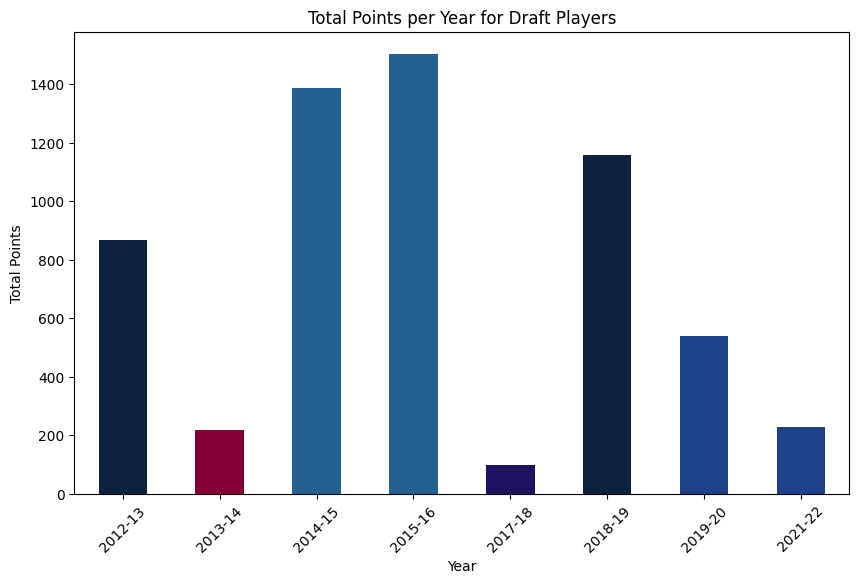

In [65]:
import matplotlib.pyplot as plt

# Define custom colors for each year
custom_colors = {
    '2012-13': '#0c2340',
    '2013-14': '#860038',
    '2014-15': '#236192',
    '2015-16': '#236192',
    '2016-17': '#006bb6',
    '2017-18': '#1d1160',
    '2018-19': '#0c2340',
    '2019-20': '#1d428a',
    '2020-21': '#0c2340',
    '2021-22': '#1d428a',
    '2022-23': '#1d428a'
}

# Plotting
ax = combined_playerdraft_stats_df.groupby('GROUP_VALUE')['PTS'].sum().plot(kind='bar', figsize=(10, 6), color=[custom_colors[year] for year in combined_playerdraft_stats_df['GROUP_VALUE']])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points per Year for Draft Players')
plt.xticks(rotation=45)
plt.show()


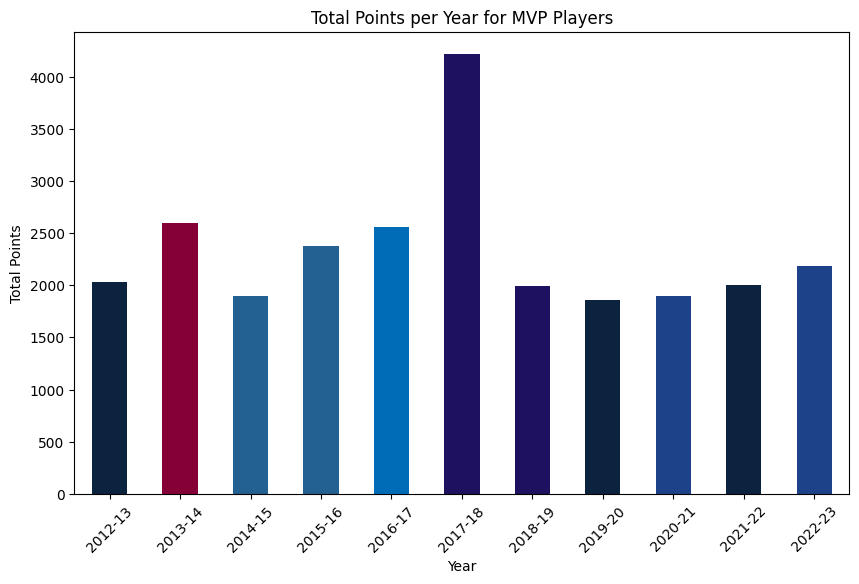

In [68]:
# Define custom colors for each year
custom_colors = {
    '2012-13': '#0c2340',
    '2013-14': '#860038',
    '2014-15': '#236192',
    '2015-16': '#236192',
    '2016-17': '#006bb6',
    '2017-18': '#1d1160',
    '2018-19': '#0c2340',
    '2019-20': '#1d428a',
    '2020-21': '#0c2340',
    '2021-22': '#1d428a',
    '2022-23': '#1d428a'
}

ax = combined_player_stats_df.groupby('GROUP_VALUE')['PTS'].sum().plot(kind='bar', figsize=(10, 6), color=[custom_colors[year] for year in combined_player_stats_df['GROUP_VALUE']])

plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points per Year for MVP Players')
plt.xticks(rotation=45)
plt.show()

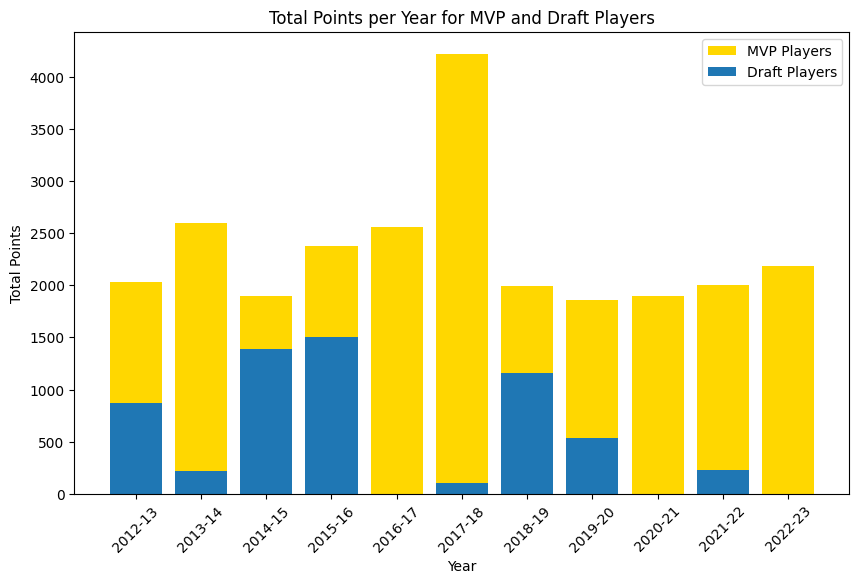

In [80]:
import matplotlib.pyplot as plt

# Define custom colors for MVP and draft players
mvp_color = '#FFD700'  
draft_color = '#1F77B4'  


fig, ax = plt.subplots(figsize=(10, 6))

# MVP Players
mvp_data = combined_player_stats_df.groupby('GROUP_VALUE')['PTS'].sum()
ax.bar(mvp_data.index, mvp_data, color=mvp_color, label='MVP Players')

# Draft Players
draft_data = combined_playerdraft_stats_df.groupby('GROUP_VALUE')['PTS'].sum()
ax.bar(draft_data.index, draft_data, color=draft_color, label='Draft Players')

plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points per Year for MVP and Draft Players')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [36]:


# Function to get team standings by year
def get_team_standings(year):
    team_stats = leaguedashteamstats.LeagueDashTeamStats(
        last_n_games=82, season=year, measure_type_detailed_defense='Base'
    )
    team_stats_df = team_stats.get_data_frames()[0]
    return team_stats_df

# List of seasons from 2012-13 to 2022-23
seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2012, 2023)]

standings_df = pd.DataFrame()

#for Seasons
for season in seasons:
    try:
        
        team_standings_df = get_team_standings(season)

        
        team_standings_df['Season'] = season

        # Sort by 'W_PCT' in descending order
        team_standings_df = team_standings_df.sort_values(by='W_PCT', ascending=False)

        # Select the top 5 teams
        top5_teams_df = team_standings_df.head(5)

        
        standings_df = pd.concat([standings_df, top5_teams_df], ignore_index=True)

    except Exception as e:
        print(f"Error fetching data for {season}: {e}")


display(standings_df)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,Season
0,1610612748,Miami Heat,82,66,16,0.805,3976.0,3148,6348,0.496,...,7,4,3,10,1,8,10,5,2,2012-13
1,1610612760,Oklahoma City Thunder,82,60,22,0.732,3966.0,3126,6504,0.481,...,21,27,9,1,2,16,8,3,1,2012-13
2,1610612759,San Antonio Spurs,82,58,24,0.707,3976.0,3210,6675,0.481,...,1,17,6,9,16,1,23,4,4,2012-13
3,1610612743,Denver Nuggets,82,57,25,0.695,3981.0,3339,6983,0.478,...,3,27,2,3,28,21,4,1,5,2012-13
4,1610612763,Memphis Grizzlies,82,56,26,0.683,3961.0,2964,6679,0.444,...,24,5,4,12,19,17,13,27,7,2012-13
5,1610612759,San Antonio Spurs,82,62,20,0.756,3951.0,3326,6844,0.486,...,1,11,20,9,15,2,25,6,1,2013-14
6,1610612760,Oklahoma City Thunder,82,59,23,0.720,3961.0,3194,6782,0.471,...,13,25,10,2,5,28,18,5,3,2013-14
7,1610612746,Los Angeles Clippers,82,57,25,0.695,3951.0,3208,6761,0.474,...,3,7,6,12,3,20,3,1,2,2013-14
8,1610612754,Indiana Pacers,82,56,26,0.683,3956.0,2949,6573,0.449,...,27,19,27,5,14,13,6,24,7,2013-14
9,1610612748,Miami Heat,82,54,28,0.659,3976.0,3142,6272,0.501,...,11,16,2,18,1,8,16,12,5,2013-14


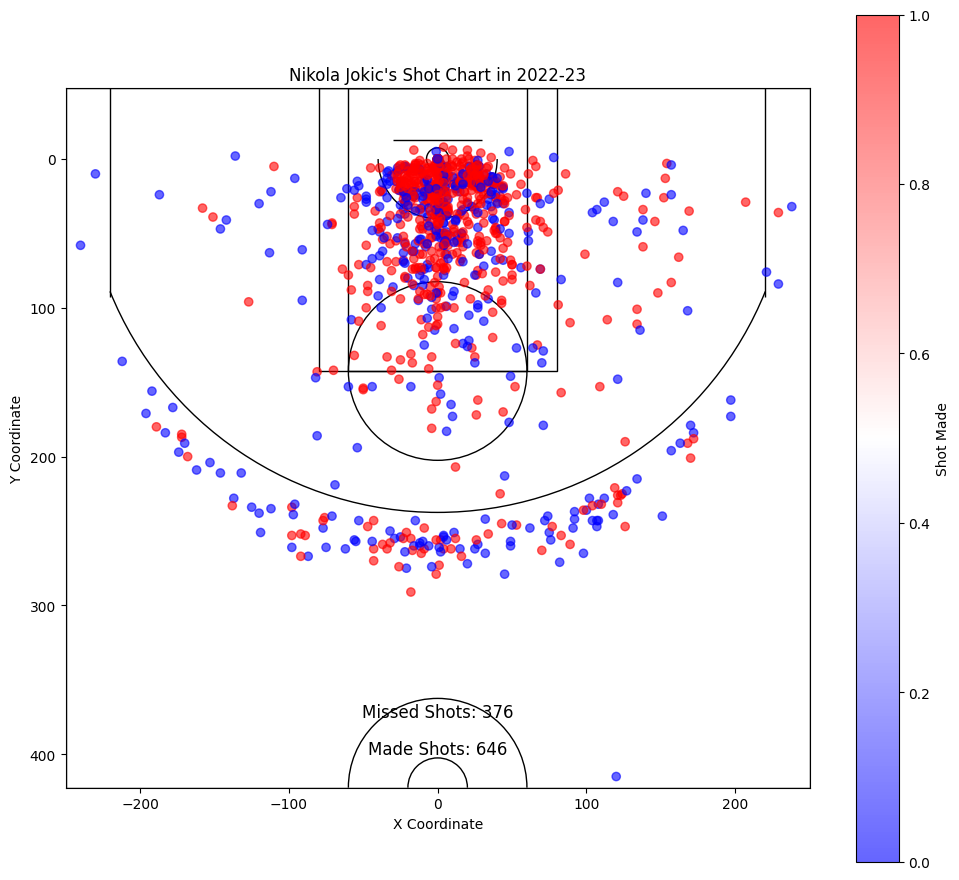

In [85]:

from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail


import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

def get_shot_chart(player_name, season_id):
    # Get player ID
    player_id = [player['id'] for player in players.get_players() if player['full_name'] == player_name][0]
    
    
    shotchart = shotchartdetail.ShotChartDetail(team_id=0, player_id=player_id, season_type_all_star="Regular Season", season_nullable=season_id, context_measure_simple="FGA").get_data_frames()[0]
    
    return shotchart, player_name, season_id

def draw_court(ax=None, color="blue", lw=1, outer_lines=False):

    if ax is None:
        ax = plt.gca()

    # Basketball Hoop
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    
    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Inner box
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Free Throw Top Arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)

    # Free Bottom Top Arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)

    # Restricted Zone
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    # Three Point Line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    # List of court shapes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)
    
def plot_shot_chart(data, player_name, season_id):
    plt.figure(figsize=(12, 11))
    draw_court(color="black", outer_lines=True)
    plt.scatter(data['LOC_X'], data['LOC_Y'], c=data['SHOT_MADE_FLAG'], cmap='bwr', alpha=0.6)
    plt.colorbar(label='Shot Made')
    plt.title(f"{player_name}'s Shot Chart in {season_id}")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(-250, 250)
    plt.ylim(422.5, -47.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(False)
    
   
    made_shots = data[data['SHOT_MADE_FLAG'] == 1]
    missed_shots = data[data['SHOT_MADE_FLAG'] == 0]
    
    # Display the number of made and missed shots
    plt.text(0, 400, f"Made Shots: {len(made_shots)}", ha='center', fontsize=12)
    plt.text(0, 375, f"Missed Shots: {len(missed_shots)}", ha='center', fontsize=12)
    
    plt.show()

if __name__ == "__main__":
    
    player_name = "Nikola Jokic"
    season_id = "2022-23"
    shotchart, _, _ = get_shot_chart(player_name, season_id)
    
    
    plot_shot_chart(shotchart, player_name, season_id)


In [40]:


# Specify parameters for each player and their respective seasons
players_and_seasons = {
    'LeBron James': ['2012-13'],
    'Kevin Durant': ['2013-14'],
    'Stephen Curry': ['2014-15', '2015-16'],
    'Russell Westbrook': ['2016-17', '2017-18'],
    'James Harden': ['2017-18'],
    'Giannis Antetokounmpo': ['2018-19', '2019-20'],
    'Nikola Jokic': ['2020-21', '2021-22'],
    'Joel Embiid': ['2022-23']
}

# Initialize an empty DataFrame
combined_player_stats_df = pd.DataFrame()

# Function to fetch and append data to the DataFrame
def fetch_and_append(player_name, seasons):
    global combined_player_stats_df  

    for season in seasons:
        # Convert player name to player ID using some mapping 
        player_id = get_player_id(player_name)
        
        player_stats_data = playerdashboardbyyearoveryear.PlayerDashboardByYearOverYear(player_id=player_id, season=season)
        player_stats_df = player_stats_data.get_data_frames()[0]

        
        selected_columns = [
            'TEAM_ID', 'TEAM_ABBREVIATION','GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
            'FG_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
            'BLK', 'BLKA', 'PF', 'PFD', 'PTS'
        ]

        # Create a new DataFrame with selected columns
        selected_player_stats_df = player_stats_df[selected_columns]

        # Append to the combined DataFrame
        combined_player_stats_df = pd.concat([combined_player_stats_df, selected_player_stats_df], ignore_index=True)

    return combined_player_stats_df

# Function to get player ID from player name 
def get_player_id(player_name):
   
    player_id_mapping = {
        'LeBron James': '2544',
        'Kevin Durant': '201142',
        'Stephen Curry': '201939',
        'Russell Westbrook': '201566',
        'James Harden': '201935',
        'Giannis Antetokounmpo': '203507',
        'Nikola Jokic': '203999',
        'Joel Embiid': '203954'
    }
    return player_id_mapping.get(player_name, None)

# Fetch and append data for each player
for player_name, seasons in players_and_seasons.items():
    combined_player_stats_df = fetch_and_append(player_name, seasons)

# Display the combined data
display(combined_player_stats_df)

,TEAM_ID,TEAM_ABBREVIATION,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS
0,1610612748,MIA,2012-13,76,61,15,0.803,2877.055000,765,1354,...,513,610,551,226,129,67,41,110,439,2036
1,1610612760,OKC,2013-14,81,58,23,0.716,3121.706667,849,1688,...,540,598,445,285,103,59,42,174,522,2593
2,1610612744,GSW,2014-15,80,67,13,0.838,2613.200000,653,1341,...,285,341,619,249,163,16,36,158,298,1900
3,1610612744,GSW,2015-16,79,71,8,0.899,2699.975000,805,1598,...,362,430,527,262,169,15,52,161,356,2375
4,1610612760,OKC,2016-17,81,46,35,0.568,2801.748333,824,1941,...,727,864,840,438,132,31,91,190,541,2558
5,1610612760,OKC,2017-18,80,47,33,0.588,2913.656667,757,1687,...,652,804,820,381,147,20,84,200,460,2028
6,1610612745,HOU,2017-18,72,59,13,0.819,2550.785000,651,1449,...,348,389,630,315,126,50,98,169,505,2191
7,1610612749,MIL,2018-19,72,56,16,0.778,2358.221667,721,1247,...,739,898,424,268,92,110,100,232,554,1994
8,1610612749,MIL,2019-20,63,51,12,0.810,1916.880000,685,1238,...,716,856,354,230,61,66,69,195,516,1857
9,1610612743,DEN,2020-21,72,47,25,0.653,2487.781667,732,1293,...,575,780,599,222,95,48,62,192,418,1898
